1
iterations
------
2
iterations
------
3
iterations
------
[ 0.1260957  -0.42890224 -0.48184394 -0.75894248 -0.64764136 -0.57122577
  0.28677695  0.38474768  0.44276304  0.42234281]


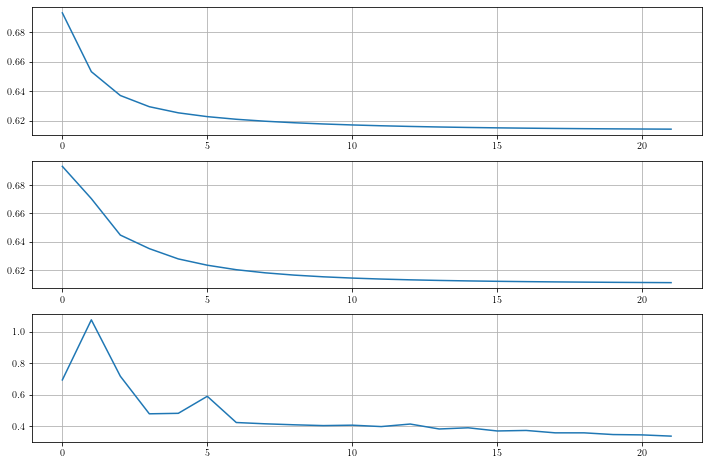

In [7]:
%run HW2_LogReg_skeleton_johnny_10_05.py

12
71


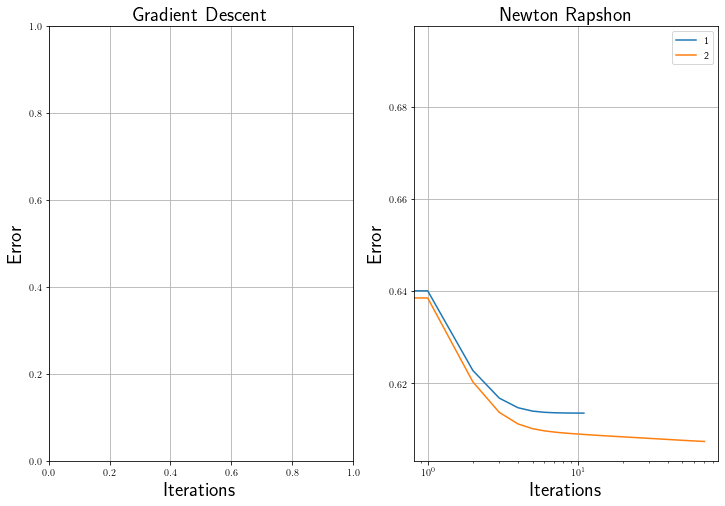

In [19]:
%run HW2_LogReg_skeleton_absi.py

x shape is: (100, 2)
y shape is: (100,)
[1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1
 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1]
Training MSE: 0.0
Testing MSE:  0.0
Training MSE: 0.0
Testing MSE:  0.0


C:\Users\woege\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


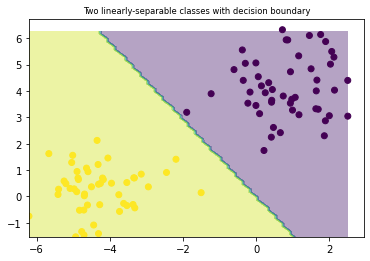

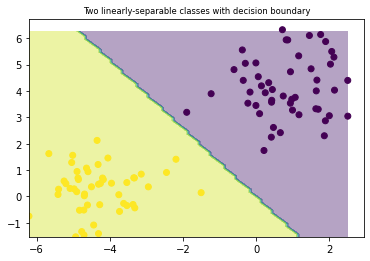

In [5]:
%run HW2_NN_perceptron.py

In [1]:
# Filename: HW2_LogReg_skeleton.py
# Author: Harald Leisenberger
# Edited: April, 2023

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
import time
plt.rcParams['text.usetex'] = True


def sum_1_to_n(n):
    return n * (n + 1) // 2
# --------------------------------------------------------------------------------
# Assignment 2 - Section 2
# --------------------------------------------------------------------------------


# !!! All undefined functions should be implemented in the section 'Helper Functions' !!!

# Load the two data arrays (training set: 400 x 3 - array, test set: 100 x 3 - array)
# Column 1: feature 1; Column 2: feature 2; Column 3: class label (0 or 1)
data_training = np.loadtxt('HW2_LogReg_training.data')
data_test = np.loadtxt('HW2_LogReg_test.data')

# 2.1 Logistic model fitting -- Gradient descent
# ----------------------------------------------

# Fit logistic models with 2D mononomial feature transformations of degree D=1, D=2 and D=3 to the training data.
# TODO: D = 1,2,3 apply gradient descent to fit the models
eta = 0.5
max_iter = 20
epsilon = 10 ** (-3)
"""
fig,axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))
eta = 0.5
max_iter = 20
epsilon = 10 ** (-3)

for D in range(1,4):
    print(D)
    def E_tilde(w): return cross_entropy_error(w, data_training, D)

    def gradient_E_tilde(w): return gradient_cross_entropy(w, data_training, D)

    w0 = np.zeros(sum_1_to_n(D + 1))
    w_star, iterations, errors = gradient_descent(E_tilde, gradient_E_tilde, w0, eta, max_iter, epsilon)
    print("------")
    #axes[D-1,0].figure(figsize=(8, 3), dpi=50, tight_layout=True)
    axes[D-1].plot(np.arange(0, iterations+1), errors)
    axes[D-1].grid()
    #axes[D-1].xlabel('iterations')
    #axes[D-1].ylabel('cross entropy error')
    #axes[D-1].title('D=3')
    #plt.savefig('grad_desc_d3.pdf')
print(w_star)
plt.show()

#eta plots
eta_arr = [0.05, 0.5, 1, 5]
fig,axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 8))
cols = ["D=1", "D=2","D=3"]
rows = ["$\eta =$ {}".format(eta) for eta in eta_arr ]

for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=90,size="large")

max_iter = 2000
epsilon = 10 ** (-3)
for D in range(1,4):
    def E_tilde(w): return cross_entropy_error(w, data_training, D)

    def gradient_E_tilde(w): return gradient_cross_entropy(w, data_training, D)

    w0 = np.zeros(sum_1_to_n(D + 1))
    n=0
    for eta in eta_arr:
        w_star, iterations, errors = gradient_descent(E_tilde, gradient_E_tilde, w0, eta, max_iter, epsilon)
        axes[n,D-1].plot(np.arange(0, iterations+1), errors)
        axes[n,D-1].grid()
        n=n+1
        #axes[D-1].xlabel('iterations')
        #axes[D-1].ylabel('cross entropy error')
        #axes[D-1].title('D=3')
        #plt.savefig('grad_desc_d3.pdf')
axes[3,0].set_xlabel("iterations",size="large")
axes[3,1].set_xlabel("iterations",size="large")
axes[3,2].set_xlabel("iterations",size="large")
#plt.savefig('eta_plot_grad.pdf')
plt.show()

"""

    #
    # # TODO: plot errors (i.e., values of E(w)) against iterations for D = 1,2,3
    #
    # # TODO: Choose different values for the step size eta and discuss the impact on the convergence behavior (D = 1,2,3)
    #
    # # TODO: plot the decision boundaries for your models on both training and test data (D = 1,2,3)
    #
    # # TODO: Compute the percentage of correctly classified points for training and test data (D = 1,2,3)
    #
    # # TODO: fit models for D = 1,2,...,10 to the data and compute the model errors on training and test set
    # eta = 0.5
    #
    # # TODO: plot number of required model parameters against D (find an analytical expression)
    #
    # # 2.2 Newton-Raphson algorithm
    # # ----------------------------------------------
    #
    # # Compare the convergence behavior of the Newton-Raphson algorithm to gradient descent
    # eta = 0.5
    #
    # def Hessian_E_tilde(w): return Hessian_cross_entropy(w, data_training, D)
    #
    # w_star, iterations, errors = Newton_Raphson(E_tilde, gradient_E_tilde, Hessian_E_tilde, w0, 1, max_iter, epsilon)
    #
    # pass



def sigmoid(x):
    """ Evaluates value of the sigmoid function for input x.
    
    Input: x ... a real-valued number
    
    Output: sigmoid(x) ... value of sigmoid function (in (0,1))
    """

    # compute sigmoid
    #y = 1 / (1 + np.e ** -x)
    y= 0.5 + np.tanh(x/2)/2

    return y


# --------------------------------------------------------------------------------

def design_matrix_logreg_2D(data, degree):
    
    """ Creates the design matrix for given data and 2D monomial basis functions as defined in equations ( ) - ( )

    Input: data ... a N x 3 - data array containing N data points (columns 0-1: features; column 2: targets)
           degree ... maximum degree of monomial product between feature 1 and feature 2

    Output: Phi ... the design matrix
    """

    # get number of samples
    N = data.shape[0]

    # calculate number of basis functions / columns of the design matrix
    phi_cols = sum_1_to_n(degree + 1)

    # initialize the design matrix
    Phi = np.zeros((N, phi_cols))

    # iterate through the samples (corresponds to one line of the design matrix)
    #print("design")
    #start=time.time()
    for n in range(0, N):

        # fetch corresponding features of n-th sample
        x1 = data[n, 0]
        x2 = data[n, 1]

        # initialize column counter (refers to the columns of the design matrix)
        column = 0

        # helper counter to yield the right order of exponent pairs: (0, 0), (1, 0), (0, 1), (2, 0), (1, 1), ...
        for counter in range(0, degree + 1):

            # d2: exponent that belongs to x2
            for d2 in range(0, counter + 1):
                # calculate design matrix
                Phi[n, column] = x1 ** (counter - d2) * x2 ** d2

                # increase column-counter by one
                column += 1
    #print(time.time()-start)
    return Phi


# --------------------------------------------------------------------------------

def cross_entropy_error(w, data, degree):
    """ Computes the cross-entropy error of a model w.r.t. given data (features + classes)
    
    Input: w ... the model parameter vector
           data ... a N x 3 - data array containing N data points (columns 0-1: features; column 2: targets)
           degree ... maximum degree of monomial product between feature 1 and feature 2
    
    Output: cross_entropy_error ... value of the cross-entropy error function \tilde{E}(w)
    """
    # cross_entropy_error = 0

    # get number of samples
    N = data.shape[0]

    # get targets
    t = data[:, 2]

    # compute design matrix
    phi = design_matrix_logreg_2D(data, degree)



    # compute regression output with w
    y = sigmoid(np.matmul(phi, w))


    # regularization term
    epsilon = 1e-10

    cross_entropy_error = -1/N * (np.inner(t, np.log(y + epsilon)) + np.inner((1 - t), np.log(1 - y + epsilon)))
    
    # TODO: implement cross entropy error function for 2 features.
    #       You will have to call the function design_matrix_logreg_2D inside this definition.

    # WARNING: If you run into numerical instabilities /overflow during the exercise this could be
    #          due to the usage log(x) with x very close to 0. Hint: replace log(x) with log(x + epsilon)
    #          with epsilon a very small number like or 1e-10.
    return cross_entropy_error


# --------------------------------------------------------------------------------

def gradient_cross_entropy(w, data, degree):
    """ Computes the gradient of the cross-entropy error function w.r.t. a model and given data (features + classes)
    
    Input: w ... the model parameter vector
           data ... a N x 3 - data array containing N data points (columns 0-1: features; column 2: targets)
           degree ... maximum degree of monomial product between feature 1 and feature 2
    
    Output: gradient_cross_entropy ... gradient of the cross-entropy error function \tilde{E}(w)
    """

    gradient_cross_entropy = np.ones((len(w), 1))

    # get number of samples
    N = data.shape[0]

    # get targets
    t = data[:, 2]

    # compute design matrix
    phi = design_matrix_logreg_2D(data, degree)

    # compute regression output with w
    y = sigmoid(np.matmul(phi, w))
    diff_t_y = t - y

    gradient_cross_entropy = -1 / N * np.sum(phi * diff_t_y[:, np.newaxis], axis=0)
    # TODO: implement gradient of the cross entropy error function for 2 features.
    #       You will have to call the function design_matrix_logreg_2D inside this definition.

    return gradient_cross_entropy


# --------------------------------------------------------------------------------

def Hessian_cross_entropy(w, data, degree):
    """ Computes the Hessian of the cross-entropy error function w.r.t. a model and given data (features + classes)
    
    Input: w ... the model parameter vector
           data ... a N x 3 - data array containing N data points (columns 0-1: features; column 2: targets)
           degree ... maximum degree of monomial product between feature 1 and feature 2
    
    Output: Hessian_cross_entropy ... Hesse matrix of the cross-entropy error function \tilde{E}(w)
    """

    Hessian_cross_entropy = np.ones((len(w), len(w)))

    # TODO: implement Hesse matrix of the cross entropy error function for 2 features.
    #       You will have to call the function design_matrix_logreg_2D inside this definition.

    return Hessian_cross_entropy


# --------------------------------------------------------------------------------

def gradient_descent(fct, grad, w0, eta, max_iter, epsilon, fct2):
    """ Performs gradient descent for minimizing an arbitrary function.
    Criterion for convergence: || gradient(w_k) || < epsilon
    
    Input: fct ... the function to be minimized
           grad ... the gradient of the function
           w0 ... starting point for gradient descent
           eta ... step size parameter
           max_iter ... maximum number of iterations to be performed
           epsilon ... tolerance parameter that regulates convergence
    
    Output: w_star ... parameter vector at time of termination
            iterations ... number of iterations performed by gradient descent
            values ... values of the function to be minimized at all iterations
    """
    #start = time.time()
    w_star = w0
    values = np.zeros(max_iter)
    values_test = np.zeros(max_iter)
    values[0] = fct(w_star)
    values_test[0] = fct2(w_star)
    gradient = grad(w_star)
    iterations = 1
    

    while np.linalg.norm(gradient) > epsilon and iterations < max_iter:
        
        #start = time.time()
        w_star = w_star - eta*gradient
        values[iterations] = fct(w_star)
        values_test[iterations] = fct2(w_star)
        
        gradient = grad(w_star)
        #print("iteration")
        #print(time.time() - start)
        iterations += 1

    values = values[0:iterations]
    return w_star, iterations, values, values_test


In [2]:
max_iter = 5
eta = 0.5
min_x1 = min(data_training.T[0])
min_x2 = min(data_training.T[1])
max_x1 = max(data_training.T[0])
max_x2 = max(data_training.T[1])
x1_vec = np.arange(min_x1-0.5,max_x1+0.5,0.01)
x2_vec = np.arange(min_x2-0.5,max_x2+0.5,0.01)

x1_vec, x2_vec = np.meshgrid(x1_vec,x2_vec)

#fi,axes = plt.subplots(nrows=10,ncols=2,figsize=(10,30))
for D in range(40,41):
    
    def E_tilde(w): return cross_entropy_error(w, data_training, D)

    def gradient_E_tilde(w): return gradient_cross_entropy(w, data_training, D)

    w0 = np.zeros(sum_1_to_n(D + 1))
    w_star, iterations, errors = gradient_descent(E_tilde, gradient_E_tilde, w0, eta, max_iter, epsilon)
    """"
    pred_out=sigmoid(design_matrix_logreg_2D(np.array([x1_vec.ravel(),x2_vec.ravel()]).T, D).dot(w_star))
    pred_out = pred_out.reshape(x1_vec.shape)
    pred_bin = np.sign(pred_out-0.5)/2 +0.5
    #use pred_bin for binary plots
    #use pred_out for contours
    axes[D-1,0].contourf(x1_vec,x2_vec,pred_bin)
    axes[D-1,1].contourf(x1_vec,x2_vec,pred_bin)


    c = ["y" if samp == 1 else "tab:purple" for samp in data_training.T[2]]
    axes[D-1,0].scatter(data_training.T[0],data_training.T[1],c=c,s=6)
    

    c = ["y" if samp == 1 else "tab:purple" for samp in data_test.T[2]]
    axes[D-1,1].scatter(data_test.T[0],data_test.T[1],c=c,s=6)
    axes[D-1,0].set_ylabel("D = {}".format(D),size="large")
    
#axes[2,0].set_xlabel("Trainings Data",size="large")
#axes[2,1].set_xlabel("Test Data",size="large")
plt.show()
"""

TypeError: gradient_descent() missing 1 required positional argument: 'fct2'

gradient smaller
gradient smaller
iterations


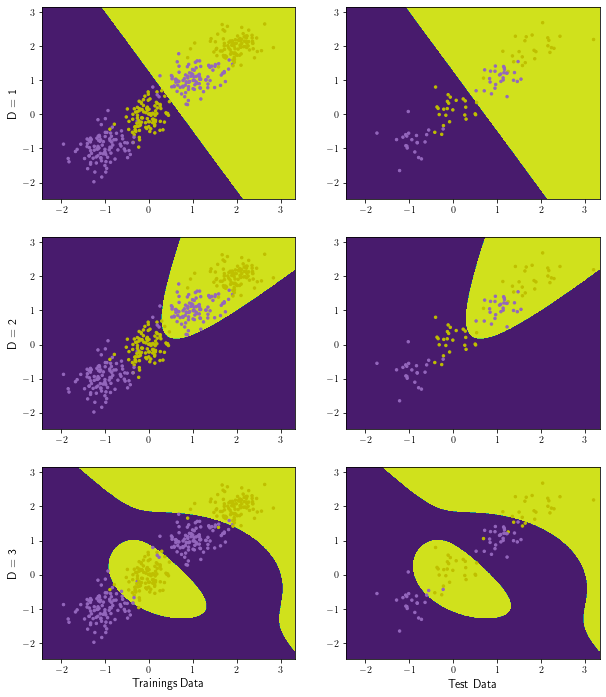

In [80]:
max_iter = 2000
min_x1 = min(data_training.T[0])
min_x2 = min(data_training.T[1])
max_x1 = max(data_training.T[0])
max_x2 = max(data_training.T[1])
x1_vec = np.arange(min_x1-0.5,max_x1+0.5,0.01)
x2_vec = np.arange(min_x2-0.5,max_x2+0.5,0.01)

x1_vec, x2_vec = np.meshgrid(x1_vec,x2_vec)

fi,axes = plt.subplots(nrows=3,ncols=2,figsize=(10,12))
for D in range(1,4):

    def E_tilde(w): return cross_entropy_error(w, data_training, D)

    def gradient_E_tilde(w): return gradient_cross_entropy(w, data_training, D)

    w0 = np.zeros(sum_1_to_n(D + 1))
    w_star, iterations, errors = gradient_descent(E_tilde, gradient_E_tilde, w0, eta, max_iter, epsilon)
    
    pred_out=sigmoid(design_matrix_logreg_2D(np.array([x1_vec.ravel(),x2_vec.ravel()]).T, D).dot(w_star))
    pred_out = pred_out.reshape(x1_vec.shape)
    pred_bin = np.sign(pred_out-0.5)/2 +0.5
    #use pred_bin for binary plots
    #use pred_out for contours
    axes[D-1,0].contourf(x1_vec,x2_vec,pred_bin)
    axes[D-1,1].contourf(x1_vec,x2_vec,pred_bin)


    c = ["y" if samp == 1 else "tab:purple" for samp in data_training.T[2]]
    axes[D-1,0].scatter(data_training.T[0],data_training.T[1],c=c,s=6)
    

    c = ["y" if samp == 1 else "tab:purple" for samp in data_test.T[2]]
    axes[D-1,1].scatter(data_test.T[0],data_test.T[1],c=c,s=6)
    axes[D-1,0].set_ylabel("D = {}".format(D),size="large")
    
axes[2,0].set_xlabel("Trainings Data",size="large")
axes[2,1].set_xlabel("Test Data",size="large")
plt.savefig("eval_test_train.pdf")
plt.show()

<Figure size 432x288 with 0 Axes>

In [73]:
eta = 0.5
test_err_vec = []
for D in range(1,11):
    def E_tilde(w): return cross_entropy_error(w, data_training, D)

    def gradient_E_tilde(w): return gradient_cross_entropy(w, data_training, D)

    w0 = np.zeros(sum_1_to_n(D + 1))
    w_star, iterations, errors = gradient_descent(E_tilde, gradient_E_tilde, w0, eta, max_iter, epsilon)
    
#     #eval train
#     pred_out=sigmoid(design_matrix_logreg_2D(data_training, D).dot(w_star))
#     pred_bin = np.sign(pred_out-0.5)/2 +0.5
#     eval_vec = pred_bin + data_training.T[2]
#     wrong = np.where(eval_vec == 1)
#     correct_det = 1 - len(wrong[0]) / len(data_training.T[2])
    
#     print("D = {} results in {}% correct detections for the training data".format(D,100*correct_det))

    #eval test
    pred_out=sigmoid(design_matrix_logreg_2D(data_test, D).dot(w_star))
    pred_bin = np.sign(pred_out-0.5)/2 +0.5
    eval_vec = pred_bin + data_test.T[2]
    wrong = np.where(eval_vec == 1)
    wrong_det = len(wrong[0]) / len(data_test.T[2])
    #print("D = {} results in {}% correct detections for the test data\n".format(D,100*correct_det))
    test_err_vec.append(wrong_det)
print("For D = {} the test error is smallest with {}%".format(1+np.argmin(test_err_vec),min(test_err_vec)))

gradient smaller
gradient smaller
iterations
iterations
iterations
iterations


<ipython-input-53-cc7125428acb>:137: RuntimeWarning: overflow encountered in power
  y = 1 / (1 + np.e ** -x)


iterations
iterations
iterations
iterations
For D = 5 the test error is smallest with 0.06%


In [7]:
for D in range(1,11):
    def E_tilde(w): return cross_entropy_error(w, data_training, D)

    def gradient_E_tilde(w): return gradient_cross_entropy(w, data_training, D)

    w0 = np.zeros(sum_1_to_n(D + 1))
    w_star, iterations, errors = gradient_descent(E_tilde, gradient_E_tilde, w0, eta, max_iter, epsilon)
    
    #eval train
    pred_out=sigmoid(design_matrix_logreg_2D(data_training, D).dot(w_star))
    pred_bin = np.sign(pred_out-0.5)/2 +0.5
    eval_vec = pred_bin + data_training.T[2]
    wrong = np.where(eval_vec == 1)
    correct_det = 1 - len(wrong[0]) / len(data_training.T[2])
    
    print("D = {} results in {}% error".format(D,100*correct_det))

    #eval test
    #pred_out=sigmoid(design_matrix_logreg_2D(data_test, D).dot(w_star))
    #pred_bin = np.sign(pred_out-0.5)/2 +0.5
    #eval_vec = pred_bin + data_test.T[2]
    #wrong = np.where(eval_vec == 1)
    #correct_det = 1 - len(wrong[0]) / len(data_test.T[2])
    #print("D = {} results in {}% correct detections for the test data\n".format(D,100*correct_det))

D = 1 results in 49.25000000000001% correct detections for the training data
D = 1 results in 47.0% correct detections for the test data

D = 2 results in 50.0% correct detections for the training data
D = 2 results in 48.0% correct detections for the test data

D = 3 results in 96.0% correct detections for the training data
D = 3 results in 93.0% correct detections for the test data

D = 4 results in 96.0% correct detections for the training data
D = 4 results in 93.0% correct detections for the test data

D = 5 results in 96.5% correct detections for the training data
D = 5 results in 93.0% correct detections for the test data

D = 6 results in 97.0% correct detections for the training data
D = 6 results in 93.0% correct detections for the test data

D = 7 results in 97.0% correct detections for the training data
D = 7 results in 92.0% correct detections for the test data

D = 8 results in 95.75% correct detections for the training data
D = 8 results in 93.0% correct detections for t

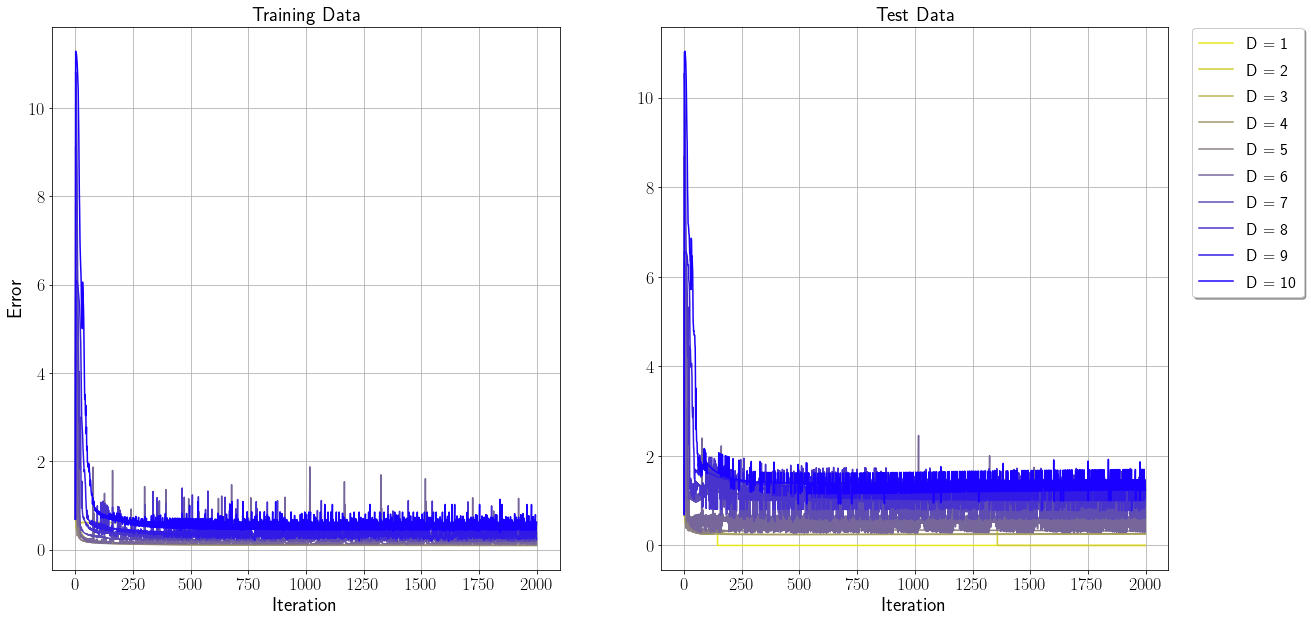

In [31]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=[20,10])
eta = 0.5
max_iter=2000
color_arr = get_color_gradient(color1, color2, 11)
epsilon = 10**(-3)

dataTEST = np.zeros([2000,11])
dataTRAIN = np.zeros([2000,11])
for D in range(1,11):
    def E_tilde(w): return cross_entropy_error(w, data_training, D)
    def E_tilde_test(w): return cross_entropy_error(w, data_test, D)
    def gradient_E_tilde(w): return gradient_cross_entropy(w, data_training, D)

    w0 = np.zeros(sum_1_to_n(D + 1))
    w_star, iterations_train, errors_train, error_test = gradient_descent(E_tilde, gradient_E_tilde, w0, eta, max_iter, epsilon, E_tilde_test)
    
    #axes[D-1,0].figure(figsize=(8, 3), dpi=50, tight_layout=True)
    length = 2000-len(errors_train)
    zeros = np.zeros(length)
    dataTRAIN[:,D] = np.append(errors_train,zeros)
    
    length = 2000-len(error_test)
    zeros = np.zeros(length)
    dataTEST[:,D] = np.append(error_test,zeros)
    
    axes[0].plot(np.arange(0, len(errors_train)), errors_train,linewidth=1.5,color=color_arr[D])
    
    #error_test = cross_entropy_error(w_star, data_test, D)
    #w_star, iterations_test, errors_test = gradient_descent(E_tilde, gradient_E_tilde, w0, eta, max_iter, epsilon)
    
    #axes[D-1,0].figure(figsize=(8, 3), dpi=50, tight_layout=True)
    axes[1].plot(np.arange(0, len(error_test)), error_test,linewidth=1.5,color=color_arr[D])
    #color=f"{D/11*0.7}"
    #print("D = {} results in {}% error for Training Data".format(D,errors_train[-1]))
    #print("D = {} results in {}% error for Test Data".format(D,error_test[-1]))
    #print()
    #axes[D-1].xlabel('iterations')
    #axes[D-1].ylabel('cross entropy error')
    #axes[D-1].title('D=3')
    #plt.savefig('grad_desc_d3.pdf')

axes[0].grid()
axes[1].grid()

axes[0].set_title("Training Data",fontsize=20)
axes[0].set_xlabel("Iteration",fontsize=20)
axes[1].set_xlabel("Iteration",fontsize=20)
axes[0].set_ylabel("Error",fontsize=20)
axes[1].set_title("Test Data",fontsize=20)
leg_data = ["D = {}".format(dummy) for dummy in range(1,11)]
fig.legend(leg_data,fontsize=17,bbox_to_anchor=(1, .89),
          fancybox=True,shadow=True)
axes[0].tick_params(axis='both' ,labelsize=18)
axes[1].tick_params(axis='both', labelsize=18)
plt.savefig('err_over_time2.pdf')
plt.show()


In [41]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]


def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

color1 = "00FF11"
color2 = "#1A00FF"

get_color_gradient(color1, color2, 11)

['#0ff101',
 '#10d91a',
 '#11c134',
 '#12a94d',
 '#139167',
 '#147880',
 '#166099',
 '#1748b3',
 '#1830cc',
 '#1918e6',
 '#1a00ff']

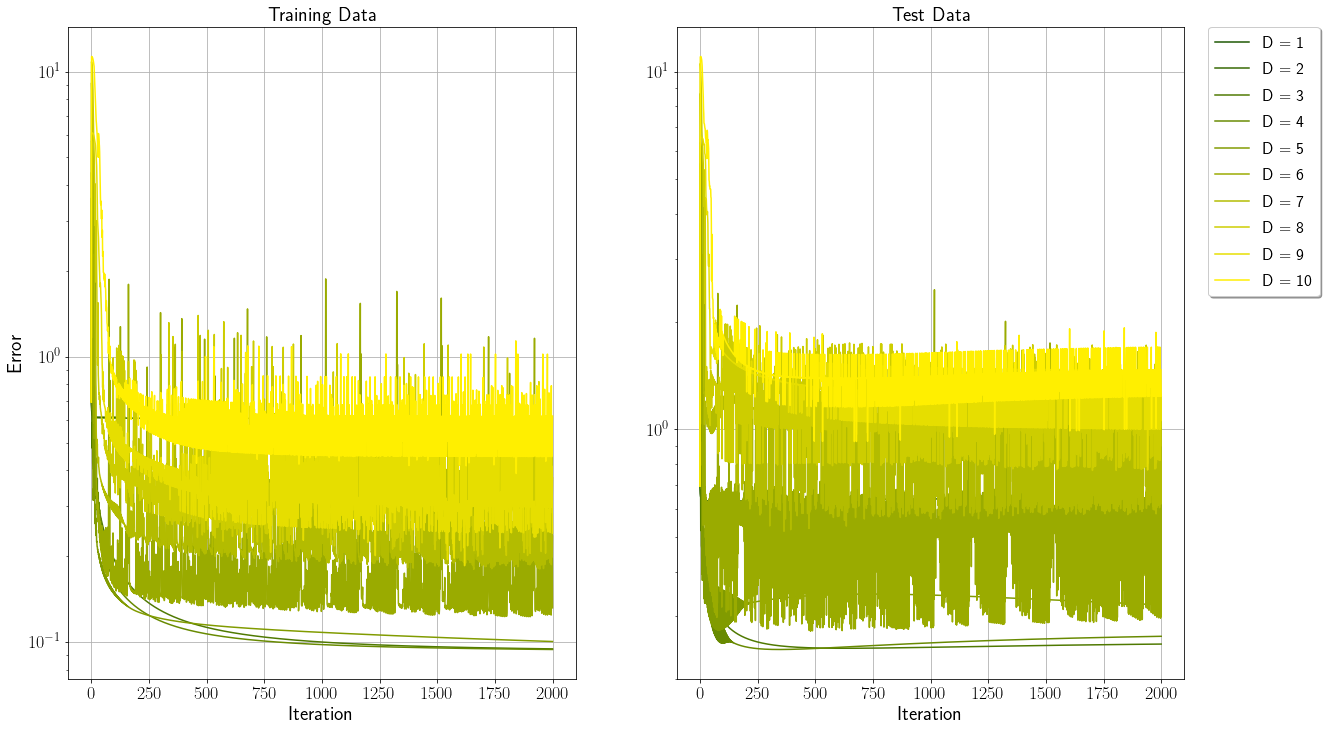

In [63]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=[20,12])
color1 = "#034601"
color2 = "#FFEF00" #geöb
color_arr = get_color_gradient(color1, color2, 11)
dataTRAIN[ dataTRAIN==0 ] = np.nan
dataTEST[ dataTEST==0 ] = np.nan
for D in range(1,11):
    axes[0].plot(np.arange(0,2000),  dataTRAIN[:,D],linewidth=1.5,color=color_arr[D])
    axes[1].plot(np.arange(0, 2000),  dataTEST[:,D],linewidth=1.5,color=color_arr[D])
axes[0].grid()
axes[1].grid()

axes[0].set_title("Training Data",fontsize=20)
axes[0].set_xlabel("Iteration",fontsize=20)
axes[1].set_xlabel("Iteration",fontsize=20)
axes[0].set_ylabel("Error",fontsize=20)
axes[1].set_title("Test Data",fontsize=20)
leg_data = ["D = {}".format(dummy) for dummy in range(1,11)]
fig.legend(leg_data,fontsize=17,bbox_to_anchor=(1, .89),
          fancybox=True,shadow=True)
axes[0].tick_params(axis='both' ,labelsize=18)
axes[1].tick_params(axis='both', labelsize=18)
axes[0].set_yscale("log")
axes[1].set_yscale("log")
plt.savefig('err_over_time2.pdf')
plt.show()